In [3]:
clc; close all;clear all;
%% Parâmetros do sinal 
fc=0.04;                              % Frequência do seno
Fs=10;                                % Frequência de amostragem
Ts = 1/Fs;                            % Tempo entre amostras
A = 10;                               % Amplitude do sinal
nC = 20000;                            % Número de períodos da onda   
t=0:Ts:nC/fc-Ts;                      % Vetor tempo
x=A*cos(2*pi*fc*t);                   % Gera o sinal x(n)
N = length(x);                        % Número de amostras do sinal
sT1 = tic; 
Px_tempo =(norm(x)^2)/N; % Cálculo da potência no tempo
disp(['Potência via amostras no tempo = ' num2str(Px_tempo) ', ' num2str(toc(sT1)) ' segundos para calcular.' ]);

sT2 = tic;
Nfft = 1000;                          % Número de pontos da FFT
Xfft=fft(x,Nfft);                     % Encontra a FFT
Xfft = Xfft/Nfft;                     % Encontra a FFT 
Px_fft = sum(Xfft.*conj(Xfft));       % Cálculo da potência na frêquencia
disp(['Potência via FFT (Parseval) = ' num2str(Px_fft) ', ' num2str(toc(sT2)) ' segundos para calcular.' ]);

sT3 = tic;
Rxx=xcorr(x,'biased');                % Estima a autocorrelaçao de x(n)
Px_Rxx = Rxx(N);                      % Cálculo da potência duas bandas via autocorrelação
disp(['Potência via autocorrelação = ' num2str(Px_Rxx) ', ' num2str(toc(sT3)) ' segundos para calcular.' ]);

sT4 = tic;
Px_bPower = bandpower(x);             % Cálculo da potência via bandpower
disp(['Potência via função bandpower = ' num2str(Px_bPower) ', ' num2str(toc(sT4)) ' segundos para calcular.' ]);

sT5 = tic;
Pvar = var(x);                        % Cálculo da potência duas bandas via variancia
disp(['Potência via variância = ' num2str(Pvar) ', ' num2str(toc(sT5)) ' segundos para calcular.' ]);

Potência via amostras no tempo = 50, 0.020625 segundos para calcular.
Potência via FFT (Parseval) = 50, 0.004757 segundos para calcular.
Potência via autocorrelação = 50, 2.1551 segundos para calcular.
Potência via função bandpower = 50, 0.049239 segundos para calcular.
Potência via variância = 50, 0.06222 segundos para calcular.


A potência máxima ocorre em 0.04 Hz
A potência estimada é 50


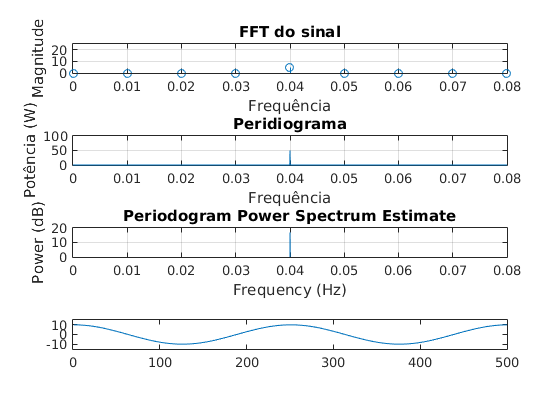

In [22]:
clc; close all;clear all;
%% Parâmetros do sinal 
fc=0.04;                              % Frequência do seno
Fs=10;                                % Frequência de amostragem
Ts = 1/Fs;                            % Tempo entre amostras
A = 10;                               % Amplitude do sinal
nC = 2000;                            % Número de períodos da onda   
t=0:Ts:nC/fc-Ts;                      % Vetor tempo
x=A*cos(2*pi*fc*t);                   % Gera o sinal x(n)
N = length(x);                        % Número de amostras do sinal

Nfft = 1000;
Xfft=fft(x,Nfft);                     % Encontra a FFT
Xfft = Xfft(1:end/2);
f=[0:Fs/Nfft:0.5*Fs-Fs/Nfft];         % Eixo da frequência
subplot(4,1,1);
stem (f,abs(Xfft)/Nfft);              % Plota a espectro
title('FFT do sinal');                % Configura título
xlabel('Frequência');
ylabel('Magnitude');
grid on;
axis([0 2*fc 0 A^2/4]);               % Zoom no gráfico

[pxx,f] = periodogram(x,hamming(length(x)),length(x),Fs,'power');
[pwrest,idx] = max(pxx);
subplot(4,1,2);
plot(f,pxx);
title('Peridiograma');
xlabel('Frequência');
ylabel('Potência (W)');
grid on;
axis([0 2*fc 0 A^2]);
disp(['A potência máxima ocorre em ' num2str(f(idx)) ' Hz' ] );
disp(['A potência estimada é ' num2str(pwrest) ] );
subplot(4,1,3);
periodogram(x,hamming(length(x)),length(x),Fs,'power');
axis([0 2*fc 0 10*log10(A^2)]);

subplot(4,1,4);
plot(x)
xlim([0 20*1/(fc)])
ylim([-15 15])